In [1]:
from google.colab import drive,output

drive.mount('/content/drive')
!ln -s "/content/drive/MyDrive/proyecto/Codigos"

Mounted at /content/drive


In [2]:
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))
# os.chdir("/content/drive/MyDrive/Codigos")
os.chdir("./Codigos")
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content
Current working directory: /content/drive/MyDrive/proyecto/Codigos


## Librerias

In [3]:
# descarga, descomprimir archivos y lectura pkl
!pip install google.colab
from google.colab import drive
!pip install zipfile_deflate64
import zipfile_deflate64 as zipfile
import pickle

# librerias genericas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerias de arquitectura
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
!pip install torchsummary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Scripts

In [4]:
import lecturadataset, procesamiento
from entrenamiento import *
from arquitectura import  *

## Lectura y exploracion

In [5]:
full_data=lecturadataset.lectura()
full_data.keys()

dict_keys(['Train', 'Validation', 'Test'])

## Procesamiento

In [ ]:
data_train=procesamiento.recorte(full_data["Train"]["images"],21)
data_val=procesamiento.recorte(full_data["Validation"]["images"],21)

# Modelos

In [ ]:
model=AutoEncoderV3()

## Entrenamiento

Epoch 1/100
Iteration 189 - Batch 189/1137 - Train loss: 0.044471186781792266
Iteration 378 - Batch 378/1137 - Train loss: 0.029835170289712876
Iteration 567 - Batch 567/1137 - Train loss: 0.024040322103144104
Iteration 756 - Batch 756/1137 - Train loss: 0.020964756968481615
Iteration 945 - Batch 945/1137 - Train loss: 0.01857755233161545
Iteration 1134 - Batch 1134/1137 - Train loss: 0.01653689468025111
Val loss: 0.0063146925531327724
Epoch 2/100
Iteration 1326 - Batch 189/1137 - Train loss: 0.006047451728954911
Iteration 1515 - Batch 378/1137 - Train loss: 0.005878080151321509
Iteration 1704 - Batch 567/1137 - Train loss: 0.005778804394370601
Iteration 1893 - Batch 756/1137 - Train loss: 0.005716650926998891
Iteration 2082 - Batch 945/1137 - Train loss: 0.005683440644437758
Iteration 2271 - Batch 1134/1137 - Train loss: 0.00563796999133992
Val loss: 0.0057765040546655655
Epoch 3/100
Iteration 2463 - Batch 189/1137 - Train loss: 0.005392630091917358
Iteration 2652 - Batch 378/1137 - T

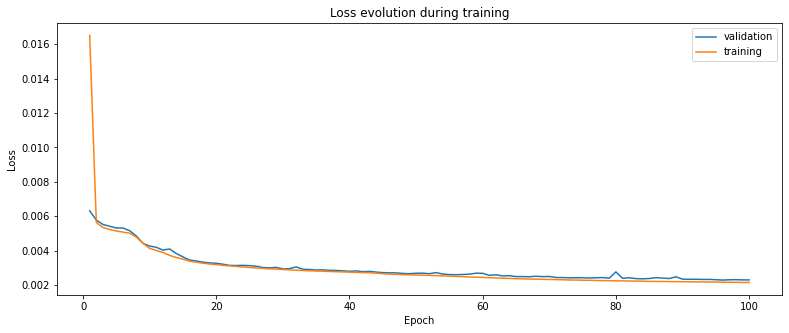

In [ ]:
lr = 5e-4
batch_size = 64
criterion = nn.MSELoss()

epochs = 100
AutoEncoder = AutoEncoderV3()

curves = train_model(
    AutoEncoder,
    data_train,
    data_val,
    epochs,
    criterion,
    batch_size,
    lr,
    use_gpu=True
)

show_curves(curves)
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

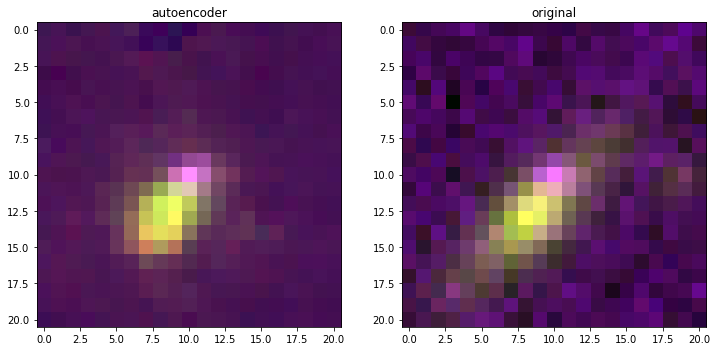

In [ ]:
# numero=120
# result=AutoEncoder(X_test[numero].reshape(1,3,21,21))
# result=result.reshape(21,21,3)
# result=result.detach().numpy()
# f, axarr = plt.subplots(1,2, figsize=(12,12)) 

## plt.imshow(result)
# axarr[0].imshow(result)
# axarr[0].set_title("autoencoder")
# axarr[1].imshow(X_test[numero].reshape(21,21,3).detach().numpy())
# axarr[1].set_title("original")
# plt.show()

In [ ]:
#torch.save(AutoEncoder.state_dict(),"./modelo_entrenadov3.pth")


In [ ]:
mode_load = AutoEncoderV3() # we do not specify pretrained=True, i.e. do not load default weights
mode_load.load_state_dict(torch.load('modelo_entrenadov3.pth'))
# mode_load.eval()

<All keys matched successfully>

In [ ]:
summary(mode_load.cuda(),input_size=(3,21,21))
data_tuples = [(x, y) for (x, y) in data_val] # Separamos el dataset en X, y
X_test = torch.stack([t[0] for t in data_tuples])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 21, 21]             448
            Conv2d-2           [-1, 16, 21, 21]             448
              ReLU-3           [-1, 16, 21, 21]               0
              ReLU-4           [-1, 16, 21, 21]               0
            Conv2d-5           [-1, 16, 21, 21]           2,320
            Conv2d-6           [-1, 16, 21, 21]           2,320
              ReLU-7           [-1, 16, 21, 21]               0
              ReLU-8           [-1, 16, 21, 21]               0
         MaxPool2d-9           [-1, 16, 10, 10]               0
        MaxPool2d-10           [-1, 16, 10, 10]               0
           Conv2d-11           [-1, 32, 10, 10]           4,640
           Conv2d-12           [-1, 32, 10, 10]           4,640
             ReLU-13           [-1, 32, 10, 10]               0
             ReLU-14           [-1, 32,

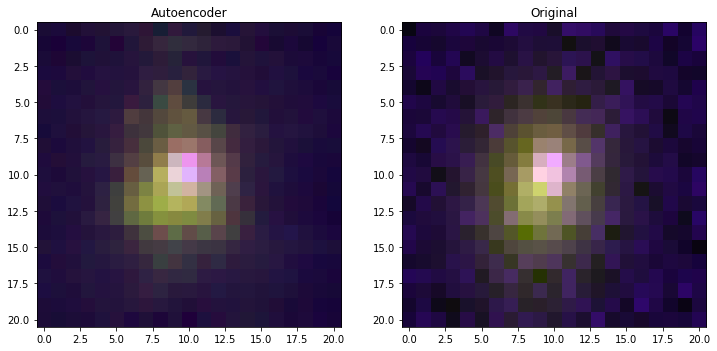

In [ ]:
mode_load.cpu()
numero=100
result=mode_load(X_test[numero].reshape(1,3,21,21))
result=result.reshape(21,21,3)
result=result.detach().numpy()
f, axarr = plt.subplots(1,2, figsize=(12,12)) 

axarr[0].imshow(result)
axarr[0].set_title("Autoencoder")
axarr[1].imshow(X_test[numero].reshape(21,21,3).detach().numpy())
axarr[1].set_title("Original")
plt.show()


In [ ]:
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')


Todo List

1.   probar 64 y 256
2.   probar redes con menos y mas parametros

Obtener vector de caracteristicas
Separar las 3 imagenes
comparar con SVM Random Forest
Ver puntos que se compararon mal
TSNE PCA UMAP del vector de caracteristicas

